### Edgar Moises Hernandez-Gonzalez
#### 09/07/19-06/02/20
#### Clasificar habla imaginada en EEG con ConvLSTM2D

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [0]:
datos = pd.read_csv("/content/drive/My Drive/HablaImaginadaDL/Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [0]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [0]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [0]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [0]:
#convertir de 2D a 5D
x = x.reshape((n_samples, 1, 1, 6, 512))
print(x.shape)

(132, 1, 1, 6, 512)


In [0]:
x = np.transpose(x, (0,1,2,4,3))

print(x.shape)

(132, 1, 1, 512, 6)


In [0]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [0]:
model = Sequential()
model.add(ConvLSTM2D(8, (1,3), activation='relu', input_shape=(1,1,512,6)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 510, 8)         1376      
_________________________________________________________________
dropout (Dropout)            (None, 1, 510, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4080)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                261184    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 262,950
Trainable params: 262,950
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 64,
                    validation_data=(x_test, y_test), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 - 1s - loss: 1.7933 - acc: 0.1515 - val_loss: 1.7948 - val_acc: 0.1818
Epoch 2/40
99/99 - 0s - loss: 1.7812 - acc: 0.2525 - val_loss: 1.7929 - val_acc: 0.1818
Epoch 3/40
99/99 - 0s - loss: 1.7717 - acc: 0.2323 - val_loss: 1.7903 - val_acc: 0.1818
Epoch 4/40
99/99 - 0s - loss: 1.7718 - acc: 0.2323 - val_loss: 1.7879 - val_acc: 0.1818
Epoch 5/40
99/99 - 0s - loss: 1.7699 - acc: 0.2525 - val_loss: 1.7864 - val_acc: 0.1818
Epoch 6/40
99/99 - 0s - loss: 1.7513 - acc: 0.2828 - val_loss: 1.7853 - val_acc: 0.1818
Epoch 7/40
99/99 - 0s - loss: 1.7574 - acc: 0.2828 - val_loss: 1.7846 - val_acc: 0.1515
Epoch 8/40
99/99 - 0s - loss: 1.7180 - acc: 0.3434 - val_loss: 1.7840 - val_acc: 0.1515
Epoch 9/40
99/99 - 0s - loss: 1.7339 - acc: 0.2929 - val_loss: 1.7835 - val_acc: 0.1515
Epoch 10/40
99/99 - 0s - loss: 1.7152 - acc: 0.3333 - val_loss: 1.7828

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 873us/sample - loss: 1.7842 - acc: 0.1515
Test loss: 1.784249161228989
Test accuracy: 0.15151516


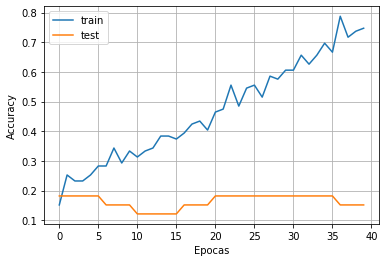

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

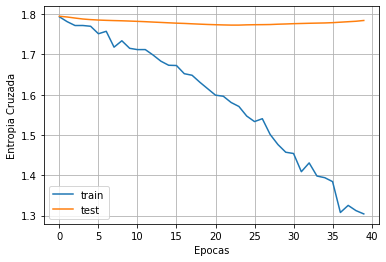

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()